# Image processing

Python provides several great libraries that allow a wide range of operation on images. For further information, please read the tutorials of:
* [OpenCV](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)
* [Scikit Image](http://scikit-image.org/docs/stable/auto_examples/index.html)

In this notebook, we just introduce a few classical image processing operations while playing with dices. The goal of the example is to count the total score one the dices, the answer being $113$.


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import ndimage
import pandas as pd
import os
%matplotlib nbagg

You can download the image used in this example here: [dices.jpg](./dices.jpg). The following code will work if the image is located in the same directory as the notebook itself. 

First, let's check if the file `dices.tif` is in the current directory. 

In [2]:
path = "dices.tif"
files = os.listdir("./")
if path in files:
    print("Ok, the file is in {0}".format(files))
else:
    print("The file is not in {0} , retry !".format(files))

Ok, the file is in ['_data', '02_Image_Processing.ipynb', '06_Practical_Work', '.ipynb_checkpoints', '00_Basics.ipynb', 'dices.tif', '04_Tutorials', '02_Advanced_Examples']


Now let's read it using **Python Image Library (aka PIL)**:

<IPython.core.display.Javascript object>


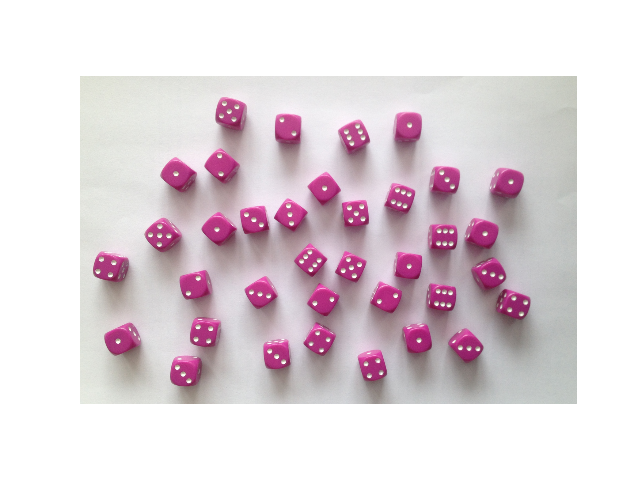

In [3]:
im = Image.open(path)
Nc, Nl = im.size
im = im.resize((Nc // 2 ,Nl // 2),Image.ANTIALIAS)
fig, ax = plt.subplots()
ax.axis("off")
plt.imshow(im)
plt.show()

## Conversion to grayscale

In [4]:
R, G, B = im.split()
R = np.array(R)
G = np.array(G)
B = np.array(B)
R

array([[223, 221, 224, ..., 195, 195, 193],
       [225, 225, 221, ..., 194, 195, 194],
       [223, 223, 223, ..., 195, 195, 195],
       ..., 
       [229, 228, 231, ..., 192, 195, 196],
       [230, 229, 229, ..., 192, 194, 195],
       [230, 229, 228, ..., 193, 195, 196]], dtype=uint8)

<IPython.core.display.Javascript object>


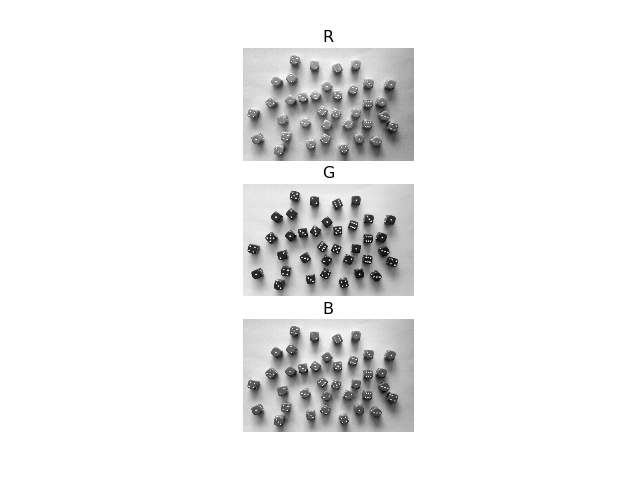

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
plt.title("R")
plt.imshow(R, cmap = cm.gray)
ax1.axis("off")
ax1 = fig.add_subplot(3, 1, 2)
plt.title("G")
plt.imshow(G, cmap = cm.gray)
ax1.axis("off")
ax1 = fig.add_subplot(3, 1, 3)
plt.title("B")
plt.imshow(B, cmap = cm.gray)
ax1.axis("off")
plt.show()


The green channel has a great contrats so we chose to work only on this channel now.

## Histogram

The histogram shows the repartition of the pixels on the color scale.

<IPython.core.display.Javascript object>


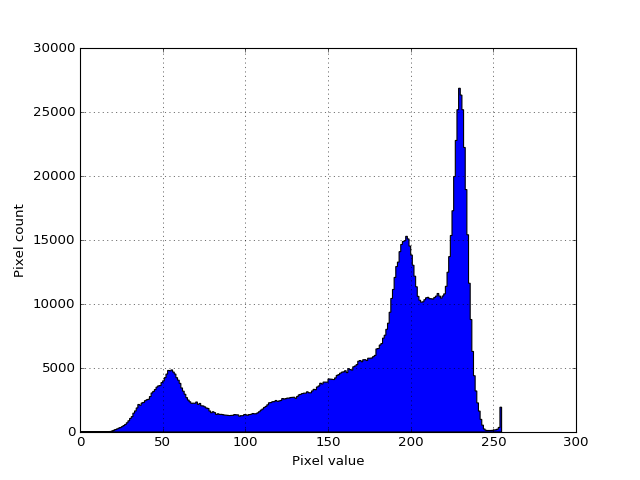

In [6]:
plt.figure()
plt.hist(G.flatten(), bins = np.arange(256), histtype = "stepfilled") 
plt.grid()
plt.xlabel("Pixel value")
plt.ylabel("Pixel count")
plt.show()

## Thresholding

Using the histogram, one can see that there are 3 peaks. The left peak is the darkest one and corresponds to the colors of the dices bodies. We can cut around $120$ to isolate the dices bodies from the dots on the dices.

Further reading: [Thresholding (Scikit)](http://scikit-image.org/docs/stable/auto_examples/xx_applications/plot_thresholding.html#sphx-glr-auto-examples-xx-applications-plot-thresholding-py)

<IPython.core.display.Javascript object>


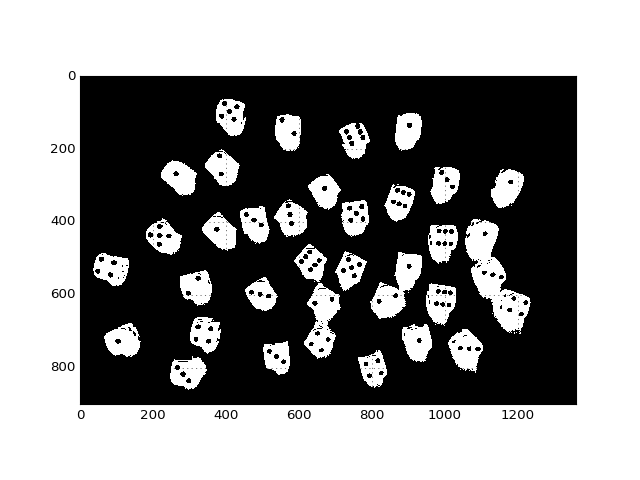

In [7]:
Gt = G < 120 # Thresholding
plt.figure()
plt.imshow(Gt, cmap = cm.gray, interpolation = "nearest")
plt.grid()
#plt.colorbar()
plt.show()

## Erosion / Dilation


<IPython.core.display.Javascript object>


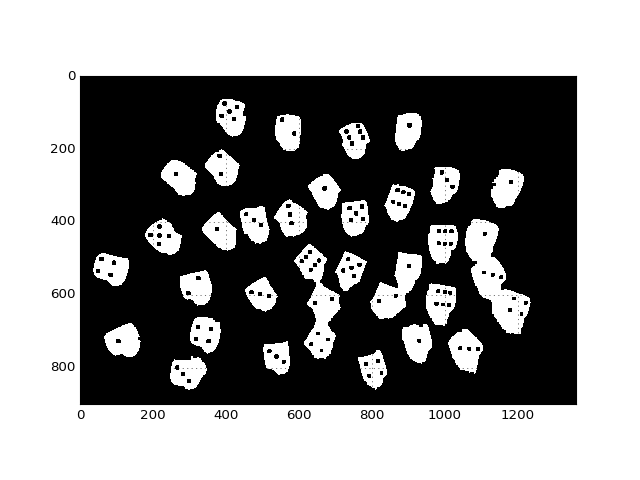

In [8]:
struc = np.ones((8,8))
Gtd = ndimage.binary_dilation(Gt, structure = struc)
Gtde = ndimage.binary_erosion(Gtd, structure = struc)
plt.figure()
plt.imshow(Gtde, cmap = cm.gray, interpolation = "nearest")
plt.grid()
plt.show()

## Labeling


In [9]:
Gtdel, number = ndimage.measurements.label(Gtde == False)
number

114

<IPython.core.display.Javascript object>


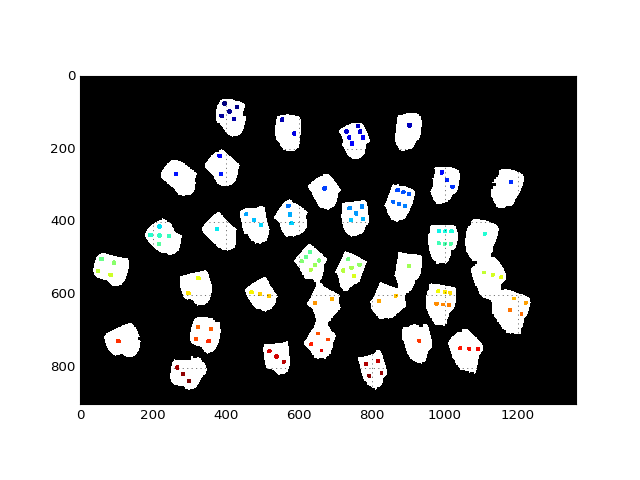

In [10]:
plt.figure()
plt.imshow(Gtde,cmap = cm.gray, interpolation = "nearest")
plt.imshow(np.where(Gtdel > 1, Gtdel, np.nan), 
           cmap = cm.jet, interpolation = "nearest")
plt.grid()
plt.show()

In [11]:
data = Gtdel.flatten()
count = np.bincount(data)
(count < 1000).sum()

113

So the total score is $113$, the method works !